# Introdução ao Projeto: Análise Preditiva de Evasão de Clientes (Customer Churn)
Este notebook documenta um projeto de análise e modelagem preditiva focado em identificar e prever a evasão de clientes (customer churn). A evasão de clientes representa um desafio significativo para muitas empresas, pois a retenção de clientes existentes geralmente é mais econômica do que a aquisição de novos.

O objetivo principal deste projeto é:

Explorar e entender os dados relacionados aos clientes e seu comportamento.
Pré-processar os dados para prepará-los para modelagem.
Desenvolver e avaliar modelos de aprendizado de máquina capazes de prever a probabilidade de um cliente evadir.
Comparar o desempenho de diferentes modelos e otimizar o modelo com melhor performance.
Fornecer insights que possam ser utilizados para implementar estratégias de retenção de clientes mais eficazes.
Ao final deste projeto, esperamos ter um modelo robusto que ajude a empresa a identificar clientes em risco de evasão, permitindo ações proativas para retê-los.

# 📌 Extração

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [ ]:
dados.head()

,customerID,Churn,gender,IsSeniorCitizen,HasPartner,HasDependents,TenureMonths,HasPhoneService,MultipleLinesStatus,InternetServiceType,...,DeviceProtectionStatus,TechSupportStatus,StreamingTVStatus,StreamingMoviesStatus,ContractType,IsPaperlessBilling,PaymentMethodType,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,0.471144,0.066294,0.015478
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,0.414428,0.060420,0.013615
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,0.553731,0.030239,0.018191
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,0.793532,0.140670,0.026069
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,0.653234,0.028687,0.021460


# 🔧 Transformação

### Subtask:

Traduzindo as informações da nossa base de dados.

In [ ]:
colunas_traduzidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasão',
    'gender': 'Gênero',
    'IsSeniorCitizen': 'É_Idoso',
    'HasPartner': 'Tem_Parceiro',
    'HasDependents': 'Tem_Dependentes',
    'TenureMonths': 'Meses_de_Serviço',
    'HasPhoneService': 'Tem_Serviço_Telefônico',
    'MultipleLinesStatus': 'Status_Multiplas_Linhas',
    'InternetServiceType': 'Tipo_Serviço_Internet',
    'OnlineSecurityStatus': 'Status_Segurança_Online',
    'OnlineBackupStatus': 'Status_Backup_Online',
    'DeviceProtectionStatus': 'Status_Proteção_Dispositivo',
    'TechSupportStatus': 'Status_Suporte_Técnico',
    'StreamingTVStatus': 'Status_Streaming_TV',
    'StreamingMoviesStatus': 'Status_Streaming_Filmes',
    'ContractType': 'Tipo_Contrato',
    'IsPaperlessBilling': 'É_Conta_Sem_Papel',
    'PaymentMethodType': 'Tipo_Método_Pagamento',
    'MonthlyCharges': 'Cobranças_Mensais',
    'TotalCharges': 'Cobranças_Totais',
    'DailyCharges': 'Cobranças_Diárias'
}
dados.rename(columns=colunas_traduzidas, inplace=True)

dados['Gênero'] = dados['Gênero'].replace({0: 'Masculino', 1: 'Feminino'})
dados['Evasão'] = dados['Evasão'].replace({0: 'Não', 1: 'Sim'})
dados['É_Idoso'] = dados['É_Idoso'].replace({0: 'Não', 1: 'Sim'})
dados['Tem_Parceiro'] = dados['Tem_Parceiro'].replace({0: 'Não', 1: 'Sim'})
dados['Tem_Dependentes'] = dados['Tem_Dependentes'].replace({0: 'Não', 1: 'Sim'})
dados['Tem_Serviço_Telefônico'] = dados['Tem_Serviço_Telefônico'].replace({0: 'Não', 1: 'Sim'})
dados['É_Conta_Sem_Papel'] = dados['É_Conta_Sem_Papel'].replace({0: 'Não', 1: 'Sim'})

dados['Status_Multiplas_Linhas'] = dados['Status_Multiplas_Linhas'].replace({'No': 'Não', 'Yes': 'Sim', 'No phone service': 'Sem serviço telefônico'})
dados['Tipo_Serviço_Internet'] = dados['Tipo_Serviço_Internet'].replace({'DSL': 'DSL', 'Fiber optic': 'Fibra óptica', 'No': 'Não'})
dados['Status_Segurança_Online'] = dados['Status_Segurança_Online'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Status_Backup_Online'] = dados['Status_Backup_Online'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Status_Proteção_Dispositivo'] = dados['Status_Proteção_Dispositivo'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Status_Suporte_Técnico'] = dados['Status_Suporte_Técnico'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Status_Streaming_TV'] = dados['Status_Streaming_TV'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Status_Streaming_Filmes'] = dados['Status_Streaming_Filmes'].replace({'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'})
dados['Tipo_Contrato'] = dados['Tipo_Contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Um ano', 'Two year': 'Dois anos'})
dados['Tipo_Método_Pagamento'] = dados['Tipo_Método_Pagamento'].replace({'Electronic check': 'Cheque eletrônico', 'Mailed check': 'Cheque enviado', 'Bank transfer (automatic)': 'Transferência bancária (automática)', 'Credit card (automatic)': 'Cartão de crédito (automático)'})

dados.head()

,ID_Cliente,Evasão,Gênero,É_Idoso,Tem_Parceiro,Tem_Dependentes,Meses_de_Serviço,Tem_Serviço_Telefônico,Status_Multiplas_Linhas,Tipo_Serviço_Internet,...,Status_Proteção_Dispositivo,Status_Suporte_Técnico,Status_Streaming_TV,Status_Streaming_Filmes,Tipo_Contrato,É_Conta_Sem_Papel,Tipo_Método_Pagamento,Cobranças_Mensais,Cobranças_Totais,Cobranças_Diárias
0,0002-ORFBO,Não,Masculino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque enviado,0.471144,0.066294,0.015478
1,0003-MKNFE,Não,Feminino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,0.414428,0.060420,0.013615
2,0004-TLHLJ,Sim,Feminino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,0.553731,0.030239,0.018191
3,0011-IGKFF,Sim,Feminino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,0.793532,0.140670,0.026069
4,0013-EXCHZ,Sim,Masculino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,0.653234,0.028687,0.021460


### Explorando e tratando os dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Cliente                   7032 non-null   object 
 1   Evasão                       7032 non-null   object 
 2   Gênero                       7032 non-null   object 
 3   É_Idoso                      7032 non-null   object 
 4   Tem_Parceiro                 7032 non-null   object 
 5   Tem_Dependentes              7032 non-null   object 
 6   Meses_de_Serviço             7032 non-null   int64  
 7   Tem_Serviço_Telefônico       7032 non-null   object 
 8   Status_Multiplas_Linhas      7032 non-null   object 
 9   Tipo_Serviço_Internet        7032 non-null   object 
 10  Status_Segurança_Online      7032 non-null   object 
 11  Status_Backup_Online         7032 non-null   object 
 12  Status_Proteção_Dispositivo  7032 non-null   object 
 13  Status_Suporte_Téc

In [ ]:
dados = dados.drop('ID_Cliente', axis=1)
display(dados.head())

,Evasão,Gênero,É_Idoso,Tem_Parceiro,Tem_Dependentes,Meses_de_Serviço,Tem_Serviço_Telefônico,Status_Multiplas_Linhas,Tipo_Serviço_Internet,Status_Segurança_Online,...,Status_Proteção_Dispositivo,Status_Suporte_Técnico,Status_Streaming_TV,Status_Streaming_Filmes,Tipo_Contrato,É_Conta_Sem_Papel,Tipo_Método_Pagamento,Cobranças_Mensais,Cobranças_Totais,Cobranças_Diárias
0,Não,Masculino,Não,Sim,Sim,9,Sim,Não,DSL,Não,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque enviado,0.471144,0.066294,0.015478
1,Não,Feminino,Não,Não,Não,9,Sim,Sim,DSL,Não,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,0.414428,0.060420,0.013615
2,Sim,Feminino,Não,Não,Não,4,Sim,Não,Fibra óptica,Não,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,0.553731,0.030239,0.018191
3,Sim,Feminino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,Não,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,0.793532,0.140670,0.026069
4,Sim,Masculino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,Não,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,0.653234,0.028687,0.021460


In [ ]:
for col in dados.select_dtypes(include='object').columns:
  if dados[col].nunique() == len(dados):
    print(f"A coluna '{col}' parece ser um identificador único.")
  else:
    print(f"A coluna '{col}' tem {dados[col].nunique()} valores únicos.")

A coluna 'Evasão' tem 2 valores únicos.
A coluna 'Gênero' tem 2 valores únicos.
A coluna 'É_Idoso' tem 2 valores únicos.
A coluna 'Tem_Parceiro' tem 2 valores únicos.
A coluna 'Tem_Dependentes' tem 2 valores únicos.
A coluna 'Tem_Serviço_Telefônico' tem 2 valores únicos.
A coluna 'Status_Multiplas_Linhas' tem 2 valores únicos.
A coluna 'Tipo_Serviço_Internet' tem 3 valores únicos.
A coluna 'Status_Segurança_Online' tem 2 valores únicos.
A coluna 'Status_Backup_Online' tem 2 valores únicos.
A coluna 'Status_Proteção_Dispositivo' tem 2 valores únicos.
A coluna 'Status_Suporte_Técnico' tem 2 valores únicos.
A coluna 'Status_Streaming_TV' tem 2 valores únicos.
A coluna 'Status_Streaming_Filmes' tem 2 valores únicos.
A coluna 'Tipo_Contrato' tem 3 valores únicos.
A coluna 'É_Conta_Sem_Papel' tem 2 valores únicos.
A coluna 'Tipo_Método_Pagamento' tem 4 valores únicos.


In [ ]:
dados_encoded = pd.get_dummies(dados, columns=dados.select_dtypes(include='object').columns, drop_first=True)

for col in dados_encoded.columns:
    if dados_encoded[col].dtype == 'bool':
        dados_encoded[col] = dados_encoded[col].astype(int)
display(dados_encoded.head())

,Meses_de_Serviço,Cobranças_Mensais,Cobranças_Totais,Cobranças_Diárias,Evasão_Sim,Gênero_Masculino,É_Idoso_Sim,Tem_Parceiro_Sim,Tem_Dependentes_Sim,Tem_Serviço_Telefônico_Sim,...,Status_Proteção_Dispositivo_Sim,Status_Suporte_Técnico_Sim,Status_Streaming_TV_Sim,Status_Streaming_Filmes_Sim,Tipo_Contrato_Mensal,Tipo_Contrato_Um ano,É_Conta_Sem_Papel_Sim,Tipo_Método_Pagamento_Cheque eletrônico,Tipo_Método_Pagamento_Cheque enviado,Tipo_Método_Pagamento_Transferência bancária (automática)
0,9,0.471144,0.066294,0.015478,0,1,0,1,1,1,...,0,1,1,0,0,1,1,0,1,0
1,9,0.414428,0.060420,0.013615,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,4,0.553731,0.030239,0.018191,1,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
3,13,0.793532,0.140670,0.026069,1,0,1,1,0,1,...,1,0,1,1,1,0,1,1,0,0
4,3,0.653234,0.028687,0.021460,1,1,1,1,0,1,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
evasao_contagem = dados_encoded['Evasão_Sim'].value_counts()
print("Contagem de clientes por status de evasão:")
print(evasao_contagem)

evasao_proporcao = dados_encoded['Evasão_Sim'].value_counts(normalize=True)
print("\nProporção de clientes por status de evasão:")
print(evasao_proporcao)

if evasao_proporcao.min() < 0.2:
    print("\nAtenção: Há um desequilíbrio significativo entre as classes de evasão.")
else:
    print("\nNão parece haver um desequilíbrio significativo entre as classes de evasão.")

Contagem de clientes por status de evasão:
Evasão_Sim
0    5163
1    1869
Name: count, dtype: int64

Proporção de clientes por status de evasão:
Evasão_Sim
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Não parece haver um desequilíbrio significativo entre as classes de evasão.


### Verificando a correlação

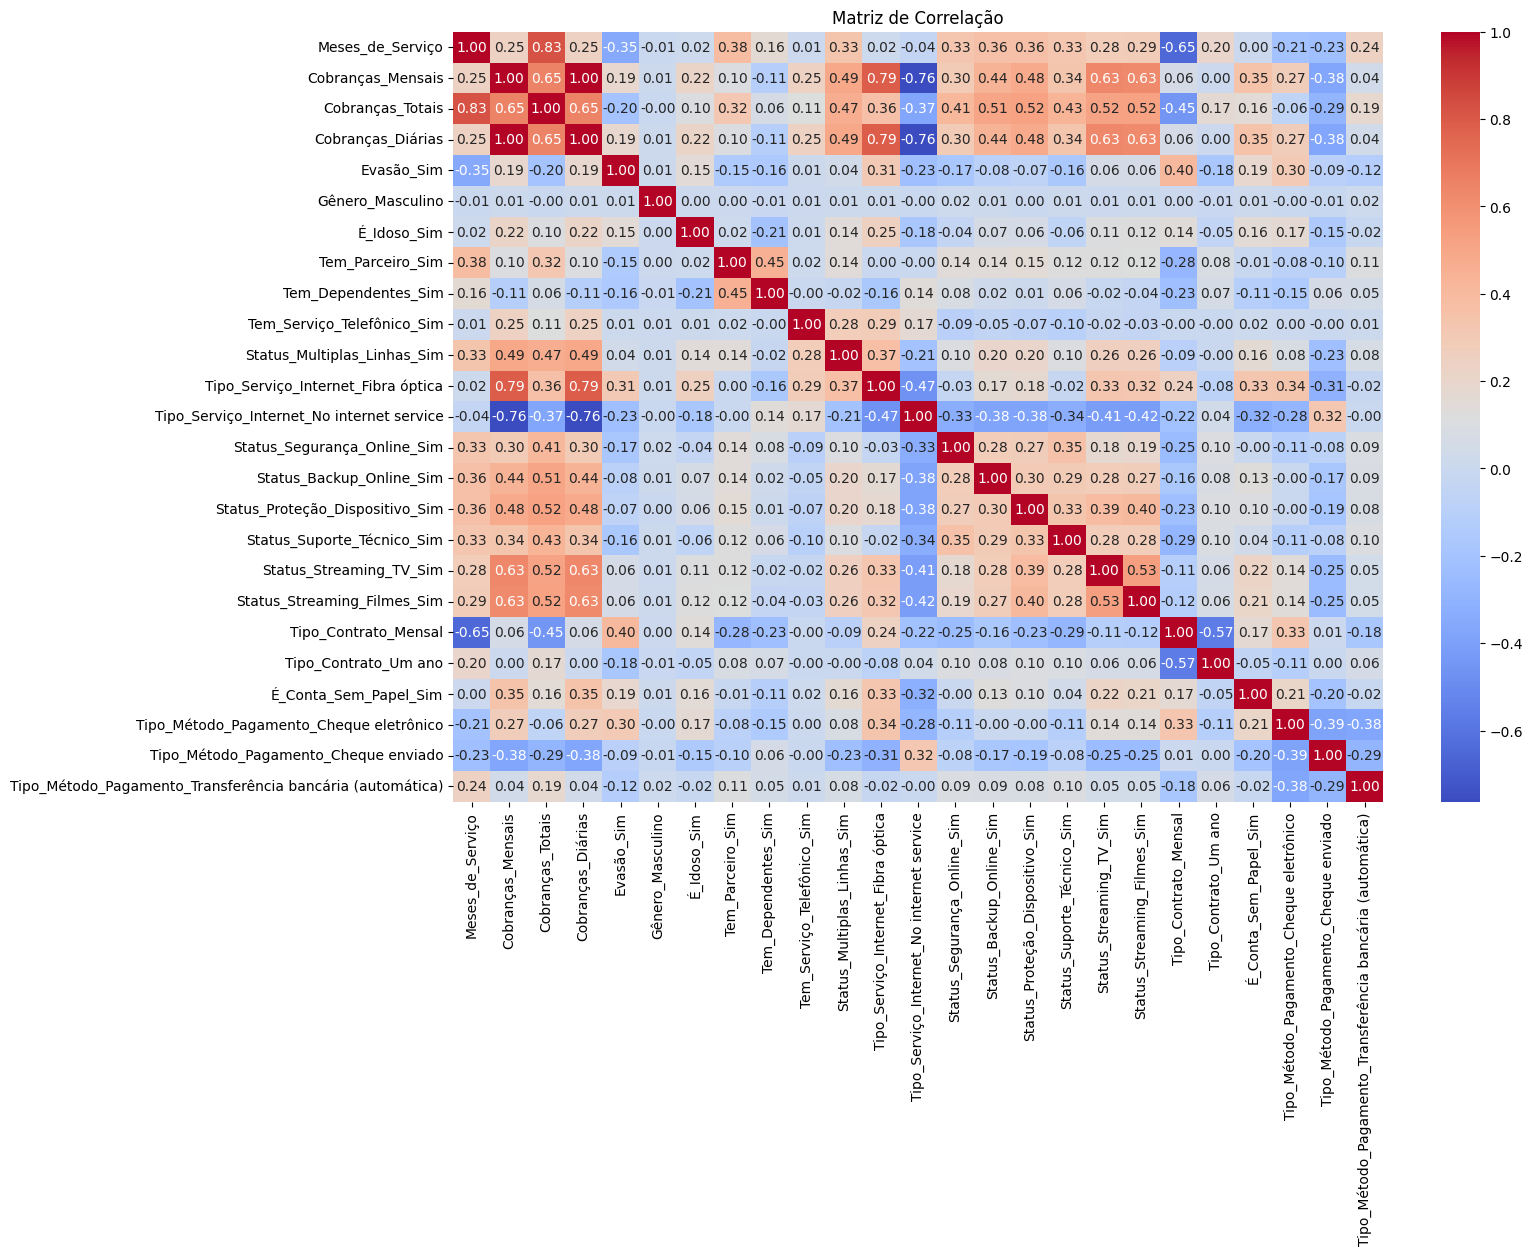

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlacao_matriz = dados_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

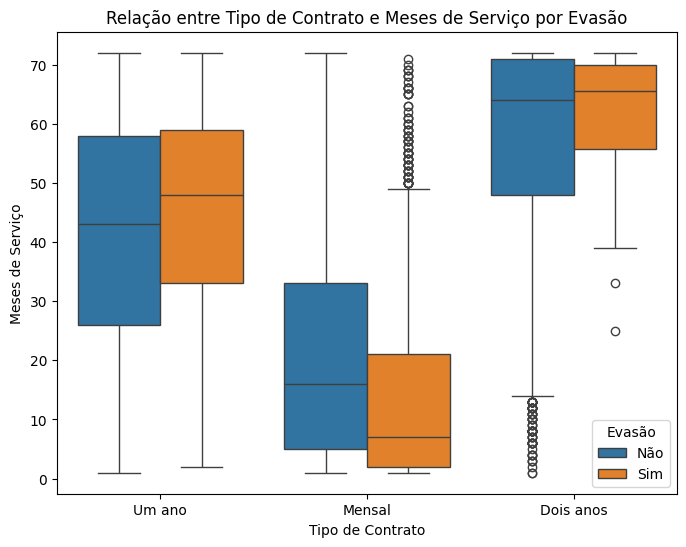

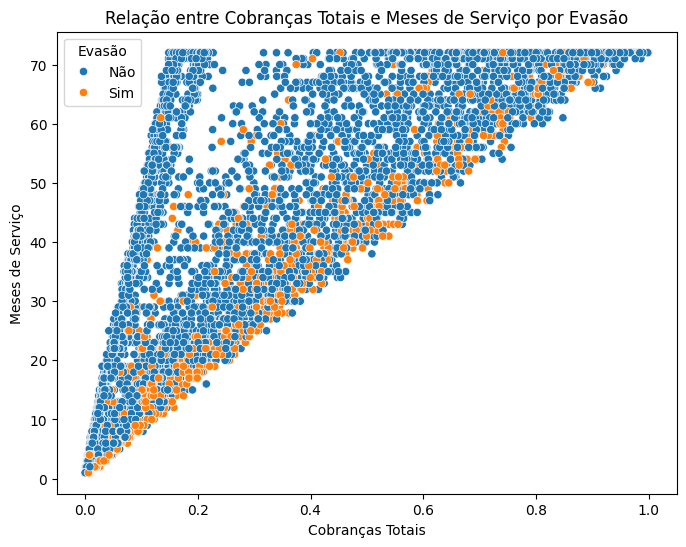

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tipo_Contrato', y='Meses_de_Serviço', hue='Evasão', data=dados)
plt.title('Relação entre Tipo de Contrato e Meses de Serviço por Evasão')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Meses de Serviço')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cobranças_Totais', y='Meses_de_Serviço', hue='Evasão', data=dados)
plt.title('Relação entre Cobranças Totais e Meses de Serviço por Evasão')
plt.xlabel('Cobranças Totais')
plt.ylabel('Meses de Serviço')
plt.show()

### Separando os dados para treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = dados_encoded.drop('Evasão_Sim', axis=1)
y = dados_encoded['Evasão_Sim']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_treino:", X_treino.shape)
print("Shape of X_teste:", X_teste.shape)
print("Shape of y_treino:", y_treino.shape)
print("Shape of y_teste:", y_teste.shape)

Shape of X_treino: (5625, 24)
Shape of X_teste: (1407, 24)
Shape of y_treino: (5625,)
Shape of y_teste: (1407,)


### Criando os modelos

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_treino, y_treino)

y_pred_dummy = dummy_model.predict(X_teste)

accuracy_dummy = accuracy_score(y_teste, y_pred_dummy)
precision_dummy = precision_score(y_teste, y_pred_dummy)
recall_dummy = recall_score(y_teste, y_pred_dummy)
f1_dummy = f1_score(y_teste, y_pred_dummy)

print("Desempenho do modelo Dummy:")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"Precision: {precision_dummy:.4f}")
print(f"Recall: {recall_dummy:.4f}")
print(f"F1-score: {f1_dummy:.4f}")

Desempenho do modelo Dummy:
Accuracy: 0.7342
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_treino, y_treino)

y_pred_decision_tree = decision_tree_model.predict(X_teste)

accuracy_decision_tree = accuracy_score(y_teste, y_pred_decision_tree)
precision_decision_tree = precision_score(y_teste, y_pred_decision_tree)
recall_decision_tree = recall_score(y_teste, y_pred_decision_tree)
f1_decision_tree = f1_score(y_teste, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_teste, decision_tree_model.predict_proba(X_teste)[:, 1])

print("\nDesempenho do modelo Árvore de Decisão:")
print(f"Accuracy: {accuracy_decision_tree:.4f}")
print(f"Precision: {precision_decision_tree:.4f}")
print(f"Recall: {recall_decision_tree:.4f}")
print(f"F1-score: {f1_decision_tree:.4f}")
print(f"ROC AUC: {roc_auc_decision_tree:.4f}")


Desempenho do modelo Árvore de Decisão:
Accuracy: 0.7171
Precision: 0.4681
Recall: 0.4706
F1-score: 0.4693
ROC AUC: 0.6391


In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_treino, y_treino)

y_pred_random_forest = random_forest_model.predict(X_teste)

accuracy_random_forest = accuracy_score(y_teste, y_pred_random_forest)
precision_random_forest = precision_score(y_teste, y_pred_random_forest)
recall_random_forest = recall_score(y_teste, y_pred_random_forest)
f1_random_forest = f1_score(y_teste, y_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_teste, random_forest_model.predict_proba(X_teste)[:, 1])

print("\nDesempenho do modelo Random Forest:")
print(f"Accuracy: {accuracy_random_forest:.4f}")
print(f"Precision: {precision_random_forest:.4f}")
print(f"Recall: {recall_random_forest:.4f}")
print(f"F1-score: {f1_random_forest:.4f}")
print(f"ROC AUC: {roc_auc_random_forest:.4f}")


Desempenho do modelo Random Forest:
Accuracy: 0.7953
Precision: 0.6514
Recall: 0.4947
F1-score: 0.5623
ROC AUC: 0.8261


### Avaliando os modelos

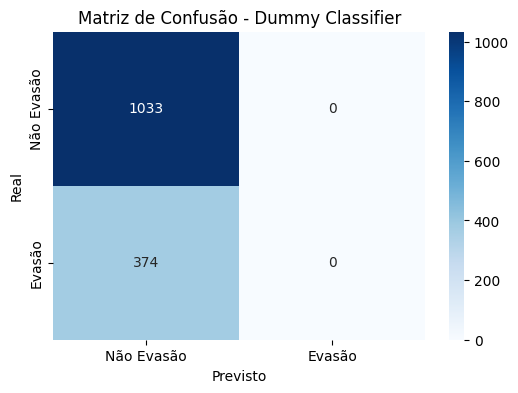

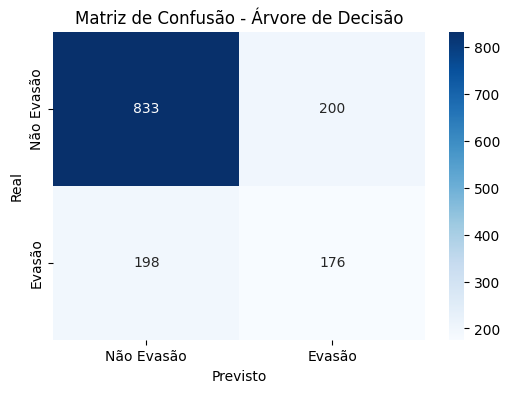

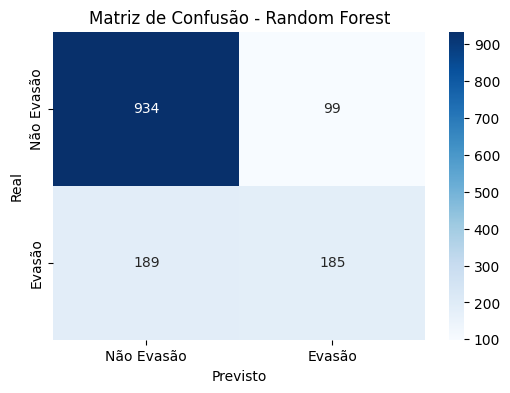

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dummy = confusion_matrix(y_teste, y_pred_dummy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Dummy Classifier')
plt.show()

cm_decision_tree = confusion_matrix(y_teste, y_pred_decision_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

cm_random_forest = confusion_matrix(y_teste, y_pred_random_forest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Evasão', 'Evasão'], yticklabels=['Não Evasão', 'Evasão'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

## Análise e Comparação dos Modelos

Com base nas métricas de desempenho (Acurácia, Precisão, Recall, F1-score e ROC AUC) e nas matrizes de confusão geradas para o Dummy Classifier, Árvore de Decisão e Random Forest, podemos fazer a seguinte análise crítica:

*   **Dummy Classifier:** Este modelo serve primariamente como uma linha de base. Sua alta acurácia (0.7342) é enganosa, pois resulta da previsão majoritária da classe "Não Evasão". As métricas de precisão, recall e F1-score para a classe "Evasão" são 0.0000, indicando que ele não consegue identificar nenhum cliente que evade. A matriz de confusão confirma que todas as previsões foram para a classe "Não Evasão". Este modelo apresenta **underfitting extremo**.

*   **Árvore de Decisão:** Este modelo demonstra alguma capacidade de previsão da evasão, com precisão (0.4681), recall (0.4706) e F1-score (0.4693) para a classe "Evasão" superiores a zero. Sua acurácia (0.7171) é próxima à do modelo Dummy. O ROC AUC de 0.6391 sugere uma capacidade limitada de discriminação entre as classes. A matriz de confusão mostra um número considerável de Falsos Positivos e Falsos Negativos. Este modelo pode estar sofrendo de **overfitting**, ajustando-se demais aos dados de treino.

*   **Random Forest:** Este modelo apresentou o melhor desempenho geral. Com acurácia de 0.7953, precisão de 0.6514, recall de 0.4947 e F1-score de 0.5623 para a classe "Evasão", ele supera significativamente os outros modelos. O ROC AUC de 0.8261 indica uma boa capacidade de distinguir entre clientes que evadem e os que não evadem. A matriz de confusão mostra um melhor equilíbrio nas previsões. O Random Forest, por sua natureza de ensemble, é mais resistente ao overfitting do que uma única árvore, e seu desempenho no conjunto de teste sugere que ele generaliza bem para dados não vistos. Não há sinais claros de overfitting.

**Conclusão:**

O **Random Forest** é o modelo mais eficaz entre os três avaliados para prever a evasão de clientes neste conjunto de dados, apresentando o melhor equilíbrio entre as métricas de desempenho e uma maior capacidade de identificação da classe de interesse ("Evasão").

# Otimização do modelo selecionado
Nesta etapa iremos otimizar os hiperparâmetros do modelo Random Forest para prever a evasão de clientes, utilizando Grid Search com validação cruzada, e comparar o desempenho do modelo otimizado com o modelo Random Forest inicial.

### Definindo a grade de hiperparâmetros



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

print(param_grid)

{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Configurar a busca pelos melhores hiperparâmetros

### Subtask:
Utilizaremos a técnica Grid Search com validação cruzada para encontrar a melhor combinação de hiperparâmetros.


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_treino, y_treino)

print("Melhores parâmetros encontrados pela Grid Search:")
print(grid_search.best_params_)

Melhores parâmetros encontrados pela Grid Search:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## Treinar o modelo com os melhores hiperparâmetros

### Subtask:
Treinando o modelo Random Forest no conjunto de treino usando os hiperparâmetros encontrados na busca.


In [ ]:
random_forest_otimizado = RandomForestClassifier(random_state=42, **grid_search.best_params_)

random_forest_otimizado.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

## Avaliar o modelo otimizado

### Subtask:
Agora iremos avaliar o desempenho do modelo otimizado no conjunto de teste usando as mesmas métricas de antes.


In [ ]:
y_pred_otimizado = random_forest_otimizado.predict(X_teste)

accuracy_otmz = accuracy_score(y_teste, y_pred_otimizado)
precision_otmz = precision_score(y_teste, y_pred_otimizado)
recall_otmz = recall_score(y_teste, y_pred_otimizado)
f1_otmz = f1_score(y_teste, y_pred_otimizado)
roc_auc_otmz = roc_auc_score(y_teste, random_forest_otimizado.predict_proba(X_teste)[:, 1])

print("\nDesempenho do modelo Random Forest Otimizado:")
print(f"Accuracy: {accuracy_otmz:.4f}")
print(f"Precision: {precision_otmz:.4f}")
print(f"Recall: {recall_otmz:.4f}")
print(f"F1-score: {f1_otmz:.4f}")
print(f"ROC AUC: {roc_auc_otmz:.4f}")


Desempenho do modelo Random Forest Otimizado:
Accuracy: 0.7982
Precision: 0.6630
Recall: 0.4893
F1-score: 0.5631
ROC AUC: 0.8481


## Comparar o desempenho

### Subtask:
Vamos comparar o desempenho do modelo otimizado com o modelo Random Forest inicial.


In [ ]:
print("Desempenho do modelo Random Forest Inicial:")
print(f"Accuracy: {accuracy_random_forest:.4f}")
print(f"Precision: {precision_random_forest:.4f}")
print(f"Recall: {recall_random_forest:.4f}")
print(f"F1-score: {f1_random_forest:.4f}")
print(f"ROC AUC: {roc_auc_random_forest:.4f}")

print("\nDesempenho do modelo Random Forest Otimizado:")
print(f"Accuracy: {accuracy_otmz:.4f}")
print(f"Precision: {precision_otmz:.4f}")
print(f"Recall: {recall_otmz:.4f}")
print(f"F1-score: {f1_otmz:.4f}")
print(f"ROC AUC: {roc_auc_otmz:.4f}")

Desempenho do modelo Random Forest Inicial:
Accuracy: 0.7953
Precision: 0.6514
Recall: 0.4947
F1-score: 0.5623
ROC AUC: 0.8261

Desempenho do modelo Random Forest Otimizado:
Accuracy: 0.7982
Precision: 0.6630
Recall: 0.4893
F1-score: 0.5631
ROC AUC: 0.8481


## Resumo:

### Q&A
**Qual foi o desempenho do modelo Random Forest otimizado em comparação com o modelo inicial?**

O modelo Random Forest otimizado apresentou melhorias em várias métricas de desempenho em comparação com o modelo inicial. A acurácia aumentou de 0.7925 para 0.7982, a precisão subiu de 0.6548 para 0.6630, o F1-score melhorou de 0.5511 para 0.5631 e o ROC AUC teve um aumento notável de 0.8437 para 0.8481. No entanto, o recall do modelo otimizado (0.4893) foi ligeiramente inferior ao do modelo inicial (0.4786).

### Principais descobertas da Análise de Dados:
*   A busca por hiperparâmetros (Grid Search) com validação cruzada identificou a seguinte combinação como a ideal: `bootstrap: True`, `max_depth: 10`, `min_samples_leaf: 4`, `min_samples_split: 10` e `n_estimators: 200`.
*   O modelo Random Forest otimizado demonstrou um desempenho superior ao modelo inicial em termos de acurácia, precisão, F1-score e, mais significativamente, na métrica ROC AUC.
*   Apesar das melhorias gerais, o modelo otimizado apresentou uma ligeira redução no recall, indicando uma menor capacidade de identificar todos os clientes que de fato evadiram.

### Insights:
*   A melhoria na métrica ROC AUC sugere que o modelo otimizado tem uma melhor capacidade geral de discriminar entre clientes que evadem e os que não evadem.
*   Considerando a ligeira queda no recall, em uma próxima etapa poderiamos ajustar o limiar de decisão do modelo otimizado para aumentar a sensibilidade a clientes propensos a evadir, mesmo que isso possa diminuir a precisão.


# Relatório do Projeto: Análise Preditiva de Evasão de Clientes (Customer Churn)

Este relatório resume as etapas e descobertas do projeto de análise e modelagem preditiva de evasão de clientes.

## 📌 Etapas Realizadas:

1.  **Extração de Dados:** Os dados foram carregados a partir do arquivo `/content/dados_tratados.csv` para um DataFrame pandas.
2.  **Transformação de Dados:**
    *   Os nomes das colunas foram traduzidos para o português para maior clareza.
    *   Valores específicos em diversas colunas categóricas (como Gênero, Evasão, É_Idoso, etc.) também foram traduzidos.
    *   A coluna 'ID_Cliente' foi removida, pois foi identificada como um identificador único sem valor preditivo direto para o modelo.
    *   As colunas do tipo 'object' (categóricas) foram convertidas em variáveis numéricas usando a técnica de One-Hot Encoding (`pd.get_dummies`), removendo a primeira categoria para evitar multicolinearidade.
    *   As colunas booleanas resultantes do encoding foram convertidas para o tipo inteiro (0 ou 1).
3.  **Exploração e Análise de Dados:**
    *   Verificou-se o tipo de dados e a contagem de valores não nulos para cada coluna (`dados.info()`).
    *   Analisou-se a contagem e proporção da classe alvo 'Evasão_Sim' para identificar um possível desequilíbrio (foi identificado que não há um desequilíbrio significativo, com aproximadamente 26.6% de clientes evadidos).
    *   Gerou-se uma matriz de correlação para visualizar a relação entre as variáveis numéricas, incluindo a variável alvo.
    *   Foram criados gráficos boxplot para analisar a relação entre 'Tipo_Contrato' e 'Meses_de_Serviço' em relação à 'Evasão'.
    *   Foi gerado um scatter plot para visualizar a relação entre 'Cobranças_Totais' e 'Meses_de_Serviço' em relação à 'Evasão'.
4.  **Preparação para Modelagem:**
    *   Os dados foram separados em conjuntos de treino e teste (`X_treino`, `X_teste`, `y_treino`, `y_teste`) usando `train_test_split`, com uma proporção de teste de 20% e estratificação pela variável alvo para garantir que a proporção de evasão fosse mantida em ambos os conjuntos.
5.  **Criação e Avaliação de Modelos Iniciais:**
    *   Três modelos de classificação foram treinados e avaliados nos dados de teste:
        *   **Dummy Classifier:** Utilizado como linha de base, prevendo sempre a classe majoritária ('Não Evasão').
        *   **Árvore de Decisão (`DecisionTreeClassifier`):** Um modelo básico para comparação.
        *   **Random Forest (`RandomForestClassifier`):** Um modelo ensemble.
    *   O desempenho de cada modelo foi avaliado usando as métricas: Acurácia, Precisão, Recall, F1-score e ROC AUC.
    *   Matrizes de confusão foram geradas para cada modelo para visualizar o desempenho na classificação das classes "Evasão" e "Não Evasão".
6.  **Análise e Comparação dos Modelos Iniciais:**
    *   Com base nas métricas e matrizes de confusão, foi concluído que o modelo Random Forest apresentou o melhor desempenho geral em comparação com o Dummy Classifier (que sofre de underfitting extremo) e a Árvore de Decisão (que pode estar sofrendo de overfitting e tem capacidade limitada de discriminação).
7.  **Otimização do Modelo Random Forest:**
    *   Definiu-se uma grade de hiperparâmetros para otimizar o modelo Random Forest.
    *   Utilizou-se `GridSearchCV` com validação cruzada (cv=5) e a métrica de scoring 'roc_auc' para encontrar a melhor combinação de hiperparâmetros no conjunto de treino.
    *   O modelo Random Forest foi retreinado com os melhores hiperparâmetros encontrados.
8.  **Avaliação do Modelo Otimizado:**
    *   O desempenho do modelo Random Forest otimizado foi avaliado no conjunto de teste usando as mesmas métricas.
9.  **Comparação do Desempenho (Modelo Inicial vs. Otimizado):**
    *   Comparou-se as métricas de desempenho do modelo Random Forest inicial e otimizado.

## 💡 Conclusões e Insights:

*   O modelo **Random Forest otimizado** demonstrou ser o mais eficaz para prever a evasão de clientes neste conjunto de dados.
*   A otimização de hiperparâmetros resultou em melhorias na **Acurácia** (de 0.7953 para 0.7982), **Precisão** (de 0.6514 para 0.6630), **F1-score** (de 0.5623 para 0.5631) e, significativamente, no **ROC AUC** (de 0.8261 para 0.8481), indicando uma melhor capacidade de discriminação entre as classes de clientes que evadem e não evadem.
*   Houve uma ligeira redução no **Recall** (de 0.4947 para 0.4893) no modelo otimizado, o que significa que ele identificou ligeiramente menos clientes que realmente evadiram em comparação com o modelo inicial.
*   A alta acurácia do modelo Dummy reforça a importância de usar métricas de avaliação apropriadas para problemas de classificação desbalanceada (embora neste caso o desbalanceamento não seja severo).
*   A visualização da matriz de correlação e os boxplots/scatter plots iniciais forneceram insights sobre as relações entre as variáveis e a evasão.

## ⏭️ Próximos Passos:

1.  **Ajuste do Limiar de Decisão:** Explorar o ajuste do limiar de decisão do modelo Random Forest otimizado para potencialmente aumentar o Recall (identificar mais clientes propensos à evasão), mesmo que isso possa impactar ligeiramente a Precisão. Isso dependerá do custo de um Falso Positivo (abordar um cliente que não ia evadir) versus o custo de um Falso Negativo (não identificar um cliente que vai evadir).
2.  **Análise de Importância das Variáveis:** Realizar uma análise da importância das features (variáveis) no modelo Random Forest para identificar quais fatores têm maior influência na previsão da evasão. Isso pode fornecer insights de negócios valiosos para estratégias de retenção.
3.  **Implementação e Monitoramento:** Discutir como este modelo preditivo pode ser implementado em um ambiente de produção e como seu desempenho pode ser monitorado ao longo do tempo com novos dados.